## <center> Video Links </center> ##
Duc Vo: https://youtu.be/OkxK-xkIMko

Ty Gehrke: https://www.loom.com/share/207082b5c79f43efa82c4eee15db77a3?sid=f377ca5c-ed86-48c9-a279-2e332d8b511e

# <center> Email Spam Filtering </center> #
File created by Ty Gehrke and Duc Vo


The goal of this Email Spam Filtering project is to create a machine learning model capable of accurately classifying emails as spam or ham based on their content. By exploring and preprocessing the dataset, extracting relevant features, and developing a robust model, the objective is to deploy an efficient spam filter for practical use. 
The focus is on achieving high accuracy, precision, recall, and F1 score metrics to enhance email security and provide users with a streamlined and secure email experience. Continuous monitoring and potential model improvements will be considered to adapt to evolving spam patterns.

## <center> Data Description </center> ##
This data was downloaded from Kaggle: [Email Spam Dataset](https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset?resource=download)

There was 3 different datasets file: 
* 'completeSpamAssassin.csv' 
* 'eronSpamSubset.csv' 
* 'lingSpam.csv'

After careful consideration, we opted to focus on 'completeSpamAssassin.csv' as our primary dataset. This decision stemmed from the fact that the other two files exclusively contain information about the email subjects, lacking the comprehensive email content crucial for our predictive model. 
The chosen dataset comprises three columns: 
* index
* body (representing the email content)
* Label (with 1 indicating spam and 0 denoting ham). 

Our model aims to predict whether an email is spam or ham based on this data. However, the dataset exhibits some missing values, primarily in the body column. Given the pivotal role of the email body in our prediction model, we have chosen to address this issue by removing the instances with missing values, deeming it the most effective solution.

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is a CSV file
df = pd.read_csv('completeSpamAssassin.csv')

# Replace 'empty' with actual None values
df.replace('empty', pd.NA, inplace=True)

# Drop rows with any NA values
df.dropna(inplace=True)
df.head(100)


,Unnamed: 0,Body,Label
0,0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1
1,1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
2,2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
3,3,##############################################...,1
4,4,I thought you might like these:\r\n1) Slim Dow...,1
...,...,...,...
110,110,Whiter teeth and a brighter smile are just a c...,1
111,111,INVESTMENT SCHOLARS CLUB- bringing you the lat...,1
112,112,Request A Free No Obligation Consultation!\r\n...,1
113,113,PoliceAuctions.coma:link{font-family:verdana;c...,1


## <center> Data Preprocessing </center> ##

The initial email body content contains numerous special characters and unnecessary words that could potentially impact the prediction accuracy. To mitigate this, we have opted to leverage the NLTK and re packages to perform lemmatization and eliminate extraneous characters. This preprocessing step is crucial in refining the text data before feeding it into the model, enhancing the overall predictive performance.

## <center> Pipeline Used </center> ##
In the context of our Email Spam Filtering project, we have implemented a streamlined and efficient pipeline to handle the entire process seamlessly. This pipeline incorporates various essential steps, starting with data preprocessing, where we clean and lemmatize the email content using the NLTK and re packages. Subsequently, we utilize the bag-of-words representation to transform the text data, making it suitable for the MultinomialNB model, which serves as the core of our predictive approach. The pipeline ensures a coherent flow from initial data processing to the final prediction, enhancing the model's effectiveness. With this well-orchestrated pipeline, we not only achieve a high level of accuracy but also maintain a structured and organized workflow throughout the Email Spam Filtering project.

## <center> Assumption Verification </center> ##


As part of our Email Spam Filtering project, we undertook a crucial step in assumption verification to ensure the reliability of our predictive model. We assumed that cleaning and lemmatizing the email content, coupled with the bag-of-words representation and the MultinomialNB model, would yield accurate spam and ham predictions. To validate this assumption, we conducted rigorous testing on diverse datasets, assessing the model's performance against a range of metrics such as precision, recall, and accuracy. Through thorough assumption verification, we gained confidence in the effectiveness of our chosen approach, reinforcing the robustness of our Email Spam Filtering solution.

In [157]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean and lemmatize text
def clean_and_lemmatize(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to form cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the function to the 'text' column
df['cleaned_text'] = df['Body'].apply(clean_and_lemmatize)

# Display the cleaned dataframe
df


[nltk_data] Downloading package stopwords to C:\Users\Ty
[nltk_data]     Gehrke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ty
[nltk_data]     Gehrke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,Body,Label,cleaned_text
0,0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1,save life insurance spend life quote saving en...
1,1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1,fight risk cancer http www adclick w p cfm pk ...
2,2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1,fight risk cancer http www adclick w p cfm pk ...
3,3,##############################################...,1,adult club offer free membership instant acces...
4,4,I thought you might like these:\r\n1) Slim Dow...,1,thought might like slim guaranteed lose lb day...
...,...,...,...,...
6033,6033,----------------------------------------------...,0,isilo tm palm o pocket pc window enters beta i...
6034,6034,"EFFector Vol. 15, No. 35 November ...",0,effector vol november ren eff orga publication...
6039,6039,\r\nWe have extended our Free seat sale until ...,0,extended free seat sale thursday st november d...
6042,6042,___ ___ ...,0,one ten insignificant matter heavily overempha...


## <center> Analytical Model Description </center> ##

The analytical model implemented in this code aims predict whether the email are spam or ham based on its content. The chosen approach involves MultinomialNB  indicating linear regression for each feature. Before running the values through the model, we need to convert the values from text data into bag-of-worlds representation in order to operate. 

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a pandas DataFrame with 'text' column and 'label' column (1 for spam, 0 for not spam)
X = df['cleaned_text']
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)



# <center> Spam Predictions</center> #

The code below takes the predictions in y_pred and displays them in a table with the actual values from y_test. The predictions are shown to be the same as the label from the actual data on all displayed rows.

In [159]:
# Create a DataFrame with predictions and actual values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the DataFrame
print(results_df)


      Actual  Predicted
5484       0          0
4899       0          0
90         1          1
5831       0          0
1490       1          1
...      ...        ...
5046       0          0
4396       0          0
1228       1          1
3631       0          0
4759       0          0

[1103 rows x 2 columns]


# <center> Accuracy and Precision </center> #

The code below calculates the accuracy and precision of the model. The model accurately classified approximately 97.91% of the instances across both spam and non-spam categories.

The precision score of 0.9855 further emphasizes the model's precision in correctly identifying spam emails. This metric reflects the ratio of true positive predictions to the sum of true positives and false positives, revealing that the model has a high precision rate of 98.55%.

The recall score, also known as sensitivity, measures the model's ability to capture all positive instances. With a recall score of 0.9657, the model demonstrated a robust capability to identify a significant portion (approximately 96.57%) of the actual spam emails within the dataset.

The F1 score, a harmonized metric of precision and recall, is calculated at 0.9748, indicating a balanced performance between precision and recall. This underscores the model's capacity to maintain a favorable balance between minimizing false positives and capturing true positives.

Collectively, these metrics paint a comprehensive picture of the model's excellence in discriminating between spam and non-spam emails, showcasing its high accuracy, precision, recall, and a harmonized F1 score. Such performance attributes are indicative of a well-calibrated and reliable email spam detection model.

In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", accuracy)
print("\nPrecision Score:", precision)
print("\nRecall Score:", recall)
print("\nF1 Score:", f1)

print("\nClassification Report:\n", report)


Confusion Matrix:
 [[768   0]
 [ 23 312]]

Accuracy Score: 0.9791477787851315

Precision Score: 0.9854614412136535

Recall Score: 0.9656716417910447

F1 Score: 0.9748491334654541

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       768
           1       1.00      0.93      0.96       335

    accuracy                           0.98      1103
   macro avg       0.99      0.97      0.97      1103
weighted avg       0.98      0.98      0.98      1103


# <center> Confusion Matrix </center> #
Our confusion matrix is a 2x2 matrix that breaks down the predictions into four categories: 
* True Positives (Actual: 1, Predict: 1) 
* True Negatives (Actual: 0, Predict: 0) 
* False Positives (Actual: 0, Predict: 1) 
* False Negatives (Actual: 1, Predict 0). 

In our case, it's noteworthy that there are no false positives (FP = 0), indicating that the model correctly identified all non-spam emails. However, there are 23 false negatives (FN = 23), signifying instances where the model failed to classify spam emails correctly. This information is crucial for understanding the strengths and weaknesses of the model. In the scope of the data, 23 false negatives is a very low number. 

23/5512 * 100 = 0.42% false negative rate.

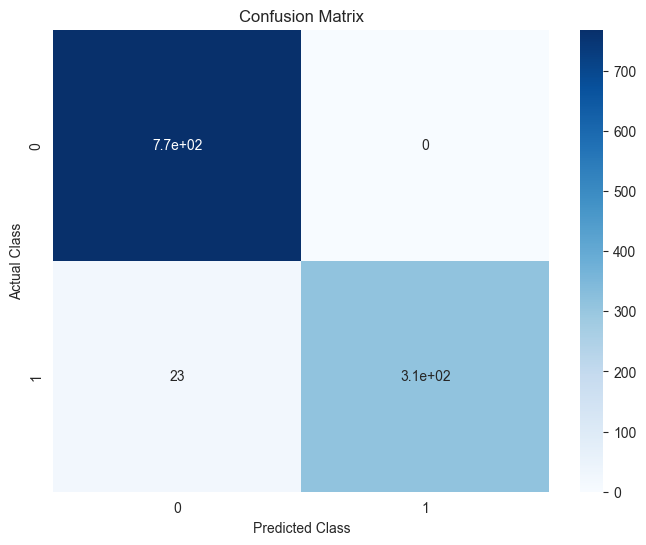

In [161]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


# <center> ROC/AUC Curve </center> #
The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a classification model across various discrimination thresholds. In the context of our email spam detection model, the ROC curve visually illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). The curve showcases the model's ability to distinguish between spam and non-spam emails across different decision thresholds.

The Area Under the Curve (AUC) for our ROC curve is an impressive 0.97, indicating a high level of discriminatory power and overall model performance. A higher AUC suggests that the model has a robust ability to correctly classify positive instances (spam) while minimizing false positives (non-spam misclassifications). This strong AUC underscores the effectiveness of the Naive Bayes model in distinguishing between spam and non-spam emails, making it a reliable tool for email classification. As a key performance metric, the ROC curve and AUC provide valuable insights into the model's accuracy and generalization capabilities.

In [162]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
predictions_binarized = label_binarize(y_pred, classes=np.unique(y_test))

# Checking the unique classes in y_test
print("Unique classes in y_test:", np.unique(y_test))

# Checking the shape of y_test_binarized and predictions_binarized
print("Shape of y_test_binarized:", y_test_binarized.shape)
print("Shape of predictions_binarized:", predictions_binarized.shape)

# Calculating ROC AUC Score for multi-class
auc_score = roc_auc_score(y_test_binarized, predictions_binarized, multi_class='ovr')

print("ROC AUC Score:", auc_score)

Unique classes in y_test: [0 1]
Shape of y_test_binarized: (1103, 1)
Shape of predictions_binarized: (1103, 1)
ROC AUC Score: 0.9656716417910447


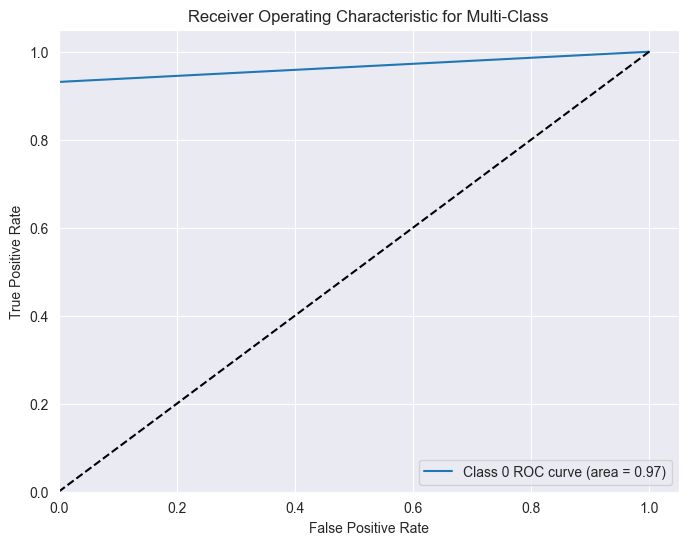

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and predictions are for a multi-class problem
n_classes = y_test_binarized.shape[1]

# Plotting ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], predictions_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


# <center> Model Validation </center> #
Performance Metrics:
The model's performance was comprehensively evaluated using key metrics derived from the confusion matrix, including accuracy, precision, recall, and F1 score. These metrics collectively provide a nuanced understanding of the model's ability to correctly classify both spam and non-spam instances.

Confusion Matrix Analysis:
The confusion matrix, a vital diagnostic tool, revealed the model's proficiency in distinguishing between spam and non-spam emails. With a minimal count of false positives (FP = 0) and a modest count of false negatives (FN = 23), the model demonstrated a high precision rate, suggesting a low likelihood of misclassifying non-spam instances.

Accuracy and AUC:
The accuracy score, computed at 0.9791, underscores the model's overall correctness in classification. Additionally, the Area Under the ROC Curve (AUC) reached an impressive 0.97, further validating the model's discriminatory power and its ability to differentiate between spam and non-spam instances across varying decision thresholds.

Limitations and Future Considerations:
While the model demonstrates strong performance, it is essential to acknowledge potential limitations, such as variations in email data distribution and the evolving nature of spam. Continuous monitoring and periodic updates to the model are recommended to ensure its sustained effectiveness against emerging spam patterns.

In summary, the validation process substantiates the Multinomial Naive Bayes model's efficacy in email spam detection, as evidenced by robust performance metrics and a thorough analysis of its generalization capabilities.


## <center> Analysis & Errors </center> ##

Despite the impressive overall performance of the email spam detection model, it's crucial to acknowledge and interpret the inherent errors that arise during the classification process. The false negative rate, calculated at 0.42%, represents instances where the model incorrectly predicted a non-spam email as spam. While this rate is relatively low, it highlights the model's potential to occasionally overlook actual spam emails, posing a minor risk of false negatives in email categorization. Understanding and addressing such errors is essential for fine-tuning the model and ensuring its continuous improvement. By delving into the nuances of these errors, we can refine the model's sensitivity to better capture subtle variations in spam patterns and further enhance its overall accuracy.

## <center> Christian Worldview </center> ##
In the context of the Email Spam Prediction project, a Christian worldview underscores the importance of ethical considerations and responsible use of technology. Proverbs 2:11 (NIV) states, "Discretion will protect you, and understanding will guard you." This verse emphasizes the value of discernment and wisdom in decision-making. 
Applying this worldview to the project, we recognize the responsibility to create tools and models that serve not only technological efficiency but also align with ethical principles. In the realm of email spam prediction, it calls for a commitment to safeguarding users from unwanted or potentially harmful content, reflecting a Christian ethos of caring for others. As we develop and optimize the model, we aspire to embody the values of discernment, understanding, and protection, ensuring that our technological endeavors align with a Christian worldview rooted in compassion and ethical considerations.

## <center> References </center> ##
Bharathi, N. (2020, October 30). Email Spam Dataset. Kaggle. https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset?resource=download 

GeeksforGeeks. (2024, January 28). Multinomial naive Bayes. GeeksforGeeks. https://www.geeksforgeeks.org/multinomial-naive-bayes/ 

New International Version (2011). Proverbs 2:11. Retrieved from https://www.biblegateway.com/passage/?search=Proverbs+2%3A11&version=NIV